In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rate_massive_mediator import *

In [2]:
R_um = 0.075 
m_phi = 1e-2

In [3]:
mx_list    = np.logspace(-4, 10, 10)
alpha_list = np.logspace(-12, -4, 10)

mx_in = mx_list[9]
alpha_t = alpha_list[7]

R = R_um / hbarc
N_T = 0.5 * ( 4/3 * np.pi * (R_um*1e-6)**3) * rho_T/mAMU
M_X = mx_in * 1e9
alpha = alpha_t * N_T
point_charge = False

In [4]:
nvels = 1078      # Number of velocities to include in integration
vlist = np.linspace(vmin, vesc, nvels)
v = vlist[0]

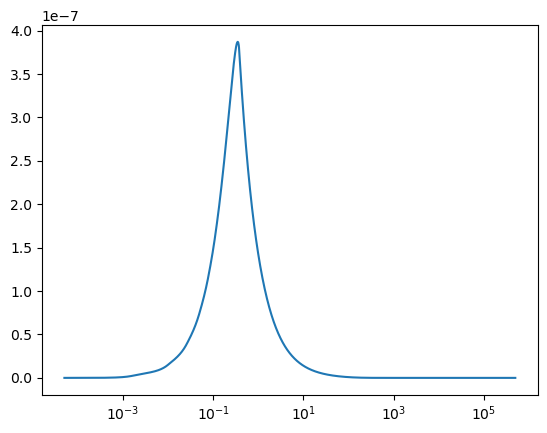

In [5]:
p, b, theta = b_theta(M_X, m_phi, R, alpha, v, point_charge)

plt.plot(b, theta)
plt.xscale('log')

In [39]:
pmax = np.max([np.min([vesc*M_X, 10*alpha/(R*vmin)]), 10e6])
nq     = 20000
q_lin  = np.linspace(100, 2*pmax*1.1, nq)

dsdq = dsig_dq(p, pmax, b, theta, q_lin)

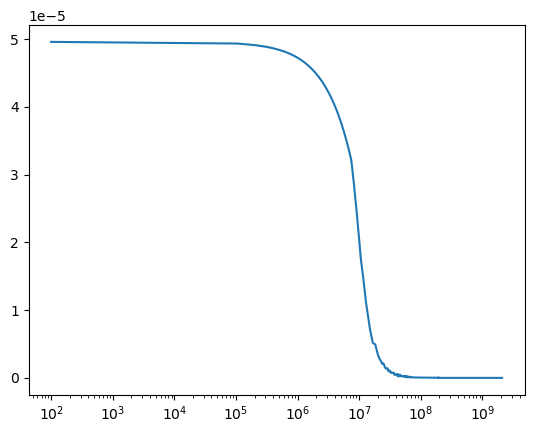

In [40]:
plt.plot(q_lin, dsdq)
plt.xscale('log')

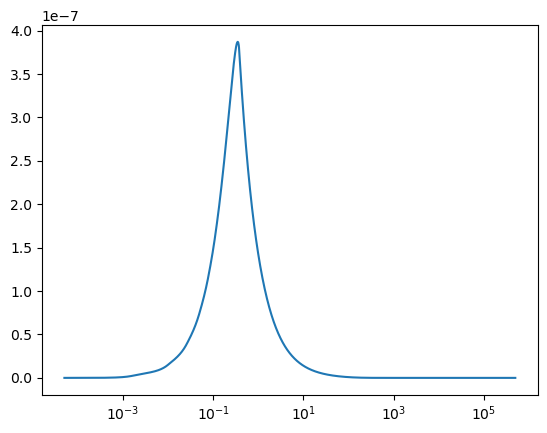

In [10]:
not_nan = np.logical_not(np.isnan(theta))
b = b[not_nan]
theta = theta[not_nan]

plt.plot(b, theta)
plt.xscale('log')

In [11]:
q  = p * np.sqrt( 2*(1-np.cos(theta)) )
np.sum(q)

37830760302.83224

In [12]:
bcidx = np.argmax(theta)
bcrit = b[bcidx]

## now need the cross section above and below bcrit
b1, t1 = b[:bcidx], theta[:bcidx]
b2, t2 = b[bcidx:], theta[bcidx:]

q1 = p * np.sqrt( 2*(1-np.cos(t1)) )
q2 = p * np.sqrt( 2*(1-np.cos(t2)) )

In [13]:
q1_sorted, b1_sorted, db1 = db_dq(q1, b1)
q2_sorted, b2_sorted, db2 = db_dq(q2, b2)

In [14]:
lnb1 = np.log(b1)
q1_sorted, q1_idx = np.unique(q1, return_index=True)
lnb1_sorted, b1_sorted = lnb1[q1_idx], b1[q1_idx]

In [20]:
lnb1_cubic = CubicSpline(q1_sorted, lnb1_sorted)
dbdq1 = b1_sorted * lnb1_cubic.derivative()( q1_sorted )

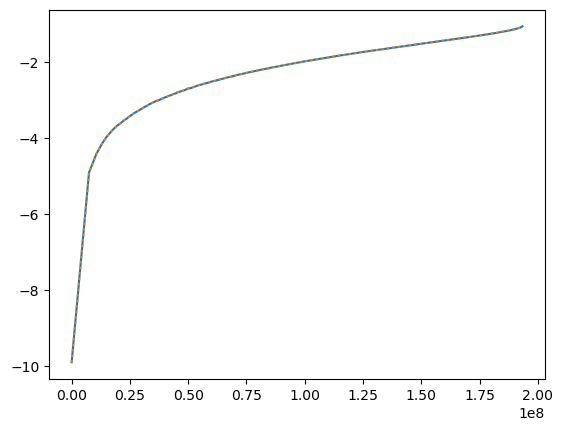

In [19]:
plt.plot(q1_sorted, lnb1_sorted)
plt.plot(q1_sorted, lnb1_cubic(q1_sorted), ':')

In [22]:
lnb2 = np.log(b2)
q2_sorted, q2_idx = np.unique(q2, return_index=True)
lnb2_sorted, b2_sorted = lnb2[q2_idx], b2[q2_idx]
lnb2_cubic = CubicSpline(q2_sorted, lnb2_sorted)
dbdq2 = b2_sorted * lnb2_cubic.derivative()( q2_sorted)

(100.0, 10000000000.0)

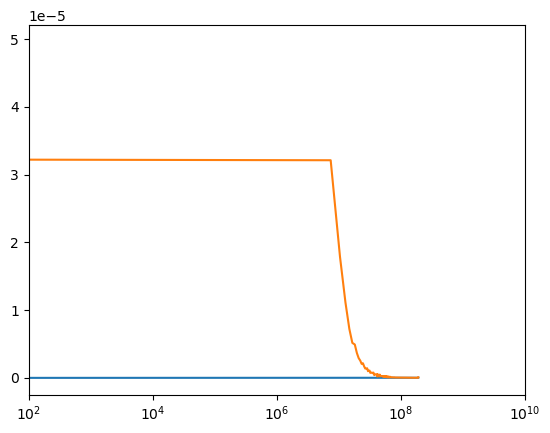

In [42]:
plt.plot(q1_sorted, 2 * np.pi * b1_sorted * np.abs(dbdq1))
plt.plot(q2_sorted, 2 * np.pi * b2_sorted * np.abs(dbdq2))
plt.xscale('log')
plt.xlim(1e2, 1e10)

In [27]:
q_lin

array([1.00000000e+02, 1.99659983e+12, 3.99319966e+12, ...,
       3.99260068e+16, 3.99280034e+16, 3.99300000e+16])

In [ ]:
np.array([np.nan]).size

In [30]:
2 * alpha / R / v

189415387.70301983

In [29]:
np.max(q)

193571762.09638387

In [36]:
np.max( (np.min((1, 3)), 2))

2

In [38]:
2.2*np.max([np.min([vesc*M_X, 10*alpha/(R*vmin)]), 10e6])

2083569264.7332184